In [1]:
import random
import numpy as np 

In [2]:
W = 0.5
c1 = 2
c2 = 2 
target = 1

In [3]:
n_iterations = 50
target_error = 1e-6
n_particles = 30

In [4]:
def visualize(particle__):
    x=[]
    y=[]
    for part in particle__:
        x.append(part[0])
        y.append(part[1])
    import matplotlib.pyplot as plt
    plt.scatter(x, y, label= "stars", color= "green",  marker= "*", s=30)
    plt.show()

In [5]:
def fitness_function(position):
    return position[0]**2 + position[1]**2 + 1

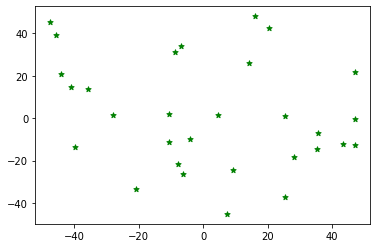

In [6]:
particle_position_vector = np.array([np.array([(-1) ** (bool(random.getrandbits(1))) * random.random()*50, (-1)**(bool(random.getrandbits(1))) * random.random()*50]) for _ in range(n_particles)])
visualize(particle_position_vector)
pbest_position = particle_position_vector
pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
gbest_fitness_value = float('inf')
gbest_position = np.array([float('inf'), float('inf')])

In [7]:
velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0
while iteration < n_iterations:
    for i in range(n_particles):
        fitness_cadidate = fitness_function(particle_position_vector[i])
        if(pbest_fitness_value[i] > fitness_cadidate):
            pbest_fitness_value[i] = fitness_cadidate
            pbest_position[i] = particle_position_vector[i]
        if(gbest_fitness_value > fitness_cadidate):
            gbest_fitness_value = fitness_cadidate
            gbest_position = particle_position_vector[i]
    if(abs(gbest_fitness_value - target) < target_error):
        break
    for i in range(n_particles):
        new_velocity = (W*velocity_vector[i]) + (c1*random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position-particle_position_vector[i])
        new_position = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = new_position
    iteration = iteration + 1

The best position is  [-0.00050213  0.00045087] in iteration number  11


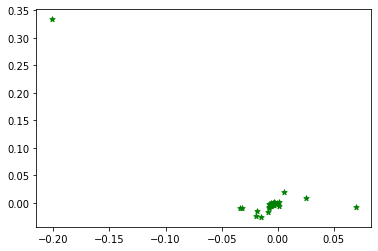

In [8]:
print("The best position is ", gbest_position, "in iteration number ", iteration)
visualize(particle_position_vector)